# **Madrid Renta per capita por distrito**

---
## **Importamos** las librerías y el data set.

In [ ]:
import pandas as pd
import json
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Cargar el archivo JSON
with open("data/Madrid_Renta_Per_Capita.json", "r", encoding="utf-8") as f:
    datos = json.load(f)

---
## **Creamos** el DataFrame.

#### **Creamos** DF desde el JSON

In [16]:
# Lista para guardar los resultados
madrid_datos = []

# Recorremos cada entrada del JSON
for entrada in datos:
    print(entrada)
    # Revisamos la sección de 'MetaData'
    for meta in entrada['MetaData']:
        # Buscamos los que contienen 'Madrid distrito'
        if "Madrid distrito" in meta["Nombre"]:
            distrito = meta["Nombre"]
            renta = entrada["Data"][0]["Valor"]  # asumimos que solo hay un valor
            madrid_datos.append({"Distrito": distrito, "Renta": renta})



{'COD': 'ADRH83527', 'Nombre': 'Acebeda, La distrito 01. Dato base. Renta neta media por persona. ', 'T3_Unidad': 'Euros', 'T3_Escala': ' ', 'MetaData': [{'Id': 344412, 'T3_Variable': 'Distritos', 'Nombre': 'Acebeda, La distrito 01', 'Codigo': '2800101'}, {'Id': 72, 'T3_Variable': 'Tipo de dato', 'Nombre': 'Dato base', 'Codigo': ''}, {'Id': 284048, 'T3_Variable': 'SALDOS CONTABLES', 'Nombre': 'Renta neta media por persona', 'Codigo': ''}], 'Data': [{'Fecha': '2022-01-01T00:00:00.000+01:00', 'T3_TipoDato': 'Definitivo', 'T3_Periodo': 'A', 'Anyo': 2022, 'Valor': 15715, 'Notas': [{'texto': 'Por no llegar al umbral poblacional requerido se presenta la renta media de los municipios de la comarca agraria con población menor de 100 habitantes.', 'Fk_TipoNota': 1, 'textoTipo': None}]}]}
{'COD': 'ADRH83525', 'Nombre': 'Ajalvir distrito 01. Dato base. Renta neta media por persona. ', 'T3_Unidad': 'Euros', 'T3_Escala': ' ', 'MetaData': [{'Id': 344414, 'T3_Variable': 'Distritos', 'Nombre': 'Ajalvi

#### **Limpiamos** el DF

In [30]:
df_renta_x_capita = pd.DataFrame(madrid_datos)
df_renta_x_capita = df_renta_x_capita.iloc[1:].reset_index(drop=True)
df_renta_x_capita["Distrito"] = df_renta_x_capita["Distrito"].str.replace("Madrid distrito ", "", regex=False)
df_renta_x_capita = df_renta_x_capita.rename(columns={"Distrito": "cod_distrito", "Renta": "renta"})

df_renta_x_capita.info()
df_renta_x_capita.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_distrito  21 non-null     object
 1   renta         21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


,cod_distrito,renta
0,01,20587
1,02,21383
2,03,25407
3,04,28140
4,05,30506
5,06,18062
6,07,27076
7,08,21947
8,09,26694
9,10,14375


---
## **Importamos** las coordenadas de los distritos de Madrid

In [36]:
# Longitud y Latitud de los distritos de Madrid.
distritos_coords = pd.DataFrame([
    {'cod_distrito':"01", 'distrito': 'Centro',       'latitud': 40.4165, 'longitud': -3.7039},
    {'cod_distrito':"02", 'distrito': 'Arganzuela',   'latitud': 40.3989, 'longitud': -3.6975},
    {'cod_distrito':"03", 'distrito': 'Retiro',       'latitud': 40.4110, 'longitud': -3.6767},
    {'cod_distrito':"04", 'distrito': 'Salamanca',    'latitud': 40.4297, 'longitud': -3.6780},
    {'cod_distrito':"05", 'distrito': 'Chamartín',    'latitud': 40.4518, 'longitud': -3.6781},
    {'cod_distrito':"06", 'distrito': 'Tetuán',       'latitud': 40.4582, 'longitud': -3.7033},
    {'cod_distrito':"07", 'distrito': 'Chamberí',     'latitud': 40.4336, 'longitud': -3.7037},
    {'cod_distrito':"08", 'distrito': 'Fuencarral-El Pardo', 'latitud': 40.5021, 'longitud': -3.7084},
    {'cod_distrito':"09", 'distrito': 'Moncloa-Aravaca','latitud': 40.4381, 'longitud': -3.7280},
    {'cod_distrito':"10", 'distrito': 'Latina',        'latitud': 40.3967, 'longitud': -3.7450},
    {'cod_distrito':"11", 'distrito': 'Carabanchel',   'latitud': 40.3823, 'longitud': -3.7409},
    {'cod_distrito':"12", 'distrito': 'Usera',         'latitud': 40.3810, 'longitud': -3.7072},
    {'cod_distrito':"13", 'distrito': 'Puente de Vallecas','latitud': 40.3851, 'longitud': -3.6622},
    {'cod_distrito':"14", 'distrito': 'Moratalaz',     'latitud': 40.4076, 'longitud': -3.6454},
    {'cod_distrito':"15", 'distrito': 'Ciudad Lineal', 'latitud': 40.4455, 'longitud': -3.6517},
    {'cod_distrito':"16", 'distrito': 'Hortaleza',     'latitud': 40.4746, 'longitud': -3.6457},
    {'cod_distrito':"17", 'distrito': 'Villaverde',    'latitud': 40.3401, 'longitud': -3.6921},
    {'cod_distrito':"18", 'distrito': 'Villa de Vallecas','latitud': 40.3754, 'longitud': -3.6279},
    {'cod_distrito':"19", 'distrito': 'Vicálvaro',     'latitud': 40.4008, 'longitud': -3.6010},
    {'cod_distrito':"20", 'distrito': 'San Blas-Canillejas','latitud': 40.4397, 'longitud': -3.6156},
    {'cod_distrito':"21", 'distrito': 'Barajas',       'latitud': 40.4719, 'longitud': -3.5795}
])

---
## **Convertimos** a GeoDataFrame

In [38]:
# Convertimos este df en un geo df para poder tener puntos de geolocalización que nos vendrá bien para los mapas.
distritos_coords["geometry"] = distritos_coords.apply(lambda r: Point(r['longitud'], r['latitud']), axis=1)
gdf_distritos = gpd.GeoDataFrame(distritos_coords, geometry='geometry', crs='EPSG:4326')

# Reproyecta ambos GeoDataFrames a un CRS en metros
# gdf_distritos = gdf_distritos.to_crs(epsg=25830) # distritos
distritos = gdf_distritos.drop(["latitud", "longitud"], axis=1)


print(distritos.crs)
print(distritos.info())
distritos.head(2)

EPSG:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  21 non-null     object  
 1   distrito      21 non-null     object  
 2   geometry      21 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 636.0+ bytes
None


,cod_distrito,distrito,geometry
0,01,Centro,POINT (-3.7039 40.4165)
1,02,Arganzuela,POINT (-3.6975 40.3989)


---
## **Unimos** las coordenadas de los distritos a nuestra df.

In [64]:
# Hacer el merge después de limpiar
# df_renta_x_capita["renta"] = df_renta_x_capita["renta"].astype(str)
distritos["cod_distrito"]  = distritos["cod_distrito"].astype(str)

df_renta_x_district = df_renta_x_capita.merge(distritos, on="cod_distrito", how="left")

df_renta_x_district = df_renta_x_district.sort_values(by="renta", ascending=False)
print(df_renta_x_district.info())
df_renta_x_district.head(21)

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 4 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cod_distrito  21 non-null     object  
 1   renta         21 non-null     int64   
 2   distrito      21 non-null     object  
 3   geometry      21 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 840.0+ bytes
None


,cod_distrito,renta,distrito,geometry
4,05,30506,Chamartín,POINT (-3.6781 40.4518)
3,04,28140,Salamanca,POINT (-3.678 40.4297)
6,07,27076,Chamberí,POINT (-3.7037 40.4336)
8,09,26694,Moncloa-Aravaca,POINT (-3.728 40.4381)
2,03,25407,Retiro,POINT (-3.6767 40.411)
7,08,21947,Fuencarral-El Pardo,POINT (-3.7084 40.5021)
15,16,21766,Hortaleza,POINT (-3.6457 40.4746)
1,02,21383,Arganzuela,POINT (-3.6975 40.3989)
20,21,20788,Barajas,POINT (-3.5795 40.4719)
0,01,20587,Centro,POINT (-3.7039 40.4165)


---
## **Convertimos** el DF en GDF.

In [50]:
gdf_renta_x_district = gpd.GeoDataFrame(df_renta_x_district, geometry='geometry', crs='EPSG:4326')

# Convertimos a web mercator
gdf_renta_x_district_wm = gdf_renta_x_district.to_crs(epsg=3857)

---
## **GRÁFICOS**

### **Pintamos** el gráfico del mapa de la Renta por distrito.

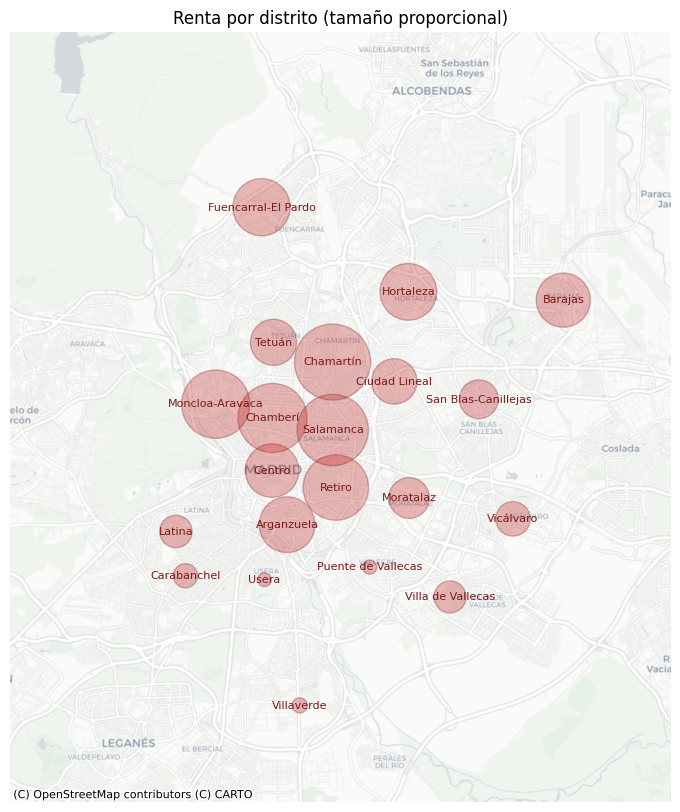

In [62]:
import numpy as np

# Escalar los valores de "renta" entre 10 y 100
tamaño_min = 100
tamaño_max = 3000

renta = gdf_renta_x_district_wm["renta"]
norm = (renta - renta.min()) / (renta.max() - renta.min())
gdf_renta_x_district_wm["tamaño"] = tamaño_min + norm * (tamaño_max - tamaño_min)

ax = gdf_renta_x_district_wm.plot(
    figsize=(10, 10),
    alpha=0.3,
    edgecolor="#7c1919",
    linewidth=1,
    color="#be1d1d",
    markersize=gdf_renta_x_district_wm["tamaño"])

# Coordenadas para ver toda la ciudad de Madrid con un poco más de margen
ax.set_xlim([-424778.23404063, -393382.69786466])
ax.set_ylim([4910895.19804772, 4947506.19846259])



# 4. Añadir texto de distritos
for x, y, label in zip(gdf_renta_x_district_wm.geometry.x,
                        gdf_renta_x_district_wm.geometry.y,
                        gdf_renta_x_district_wm["distrito"]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color="#7c1919")

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

plt.axis('off')
plt.title("Renta por distrito (tamaño proporcional)")

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/Madrid_renta_por_distrito.png", dpi=150, bbox_inches='tight')

plt.show()

---
### **Pintamos** el Gráfico de barras de la Renta por distritos. de mayor a menor.

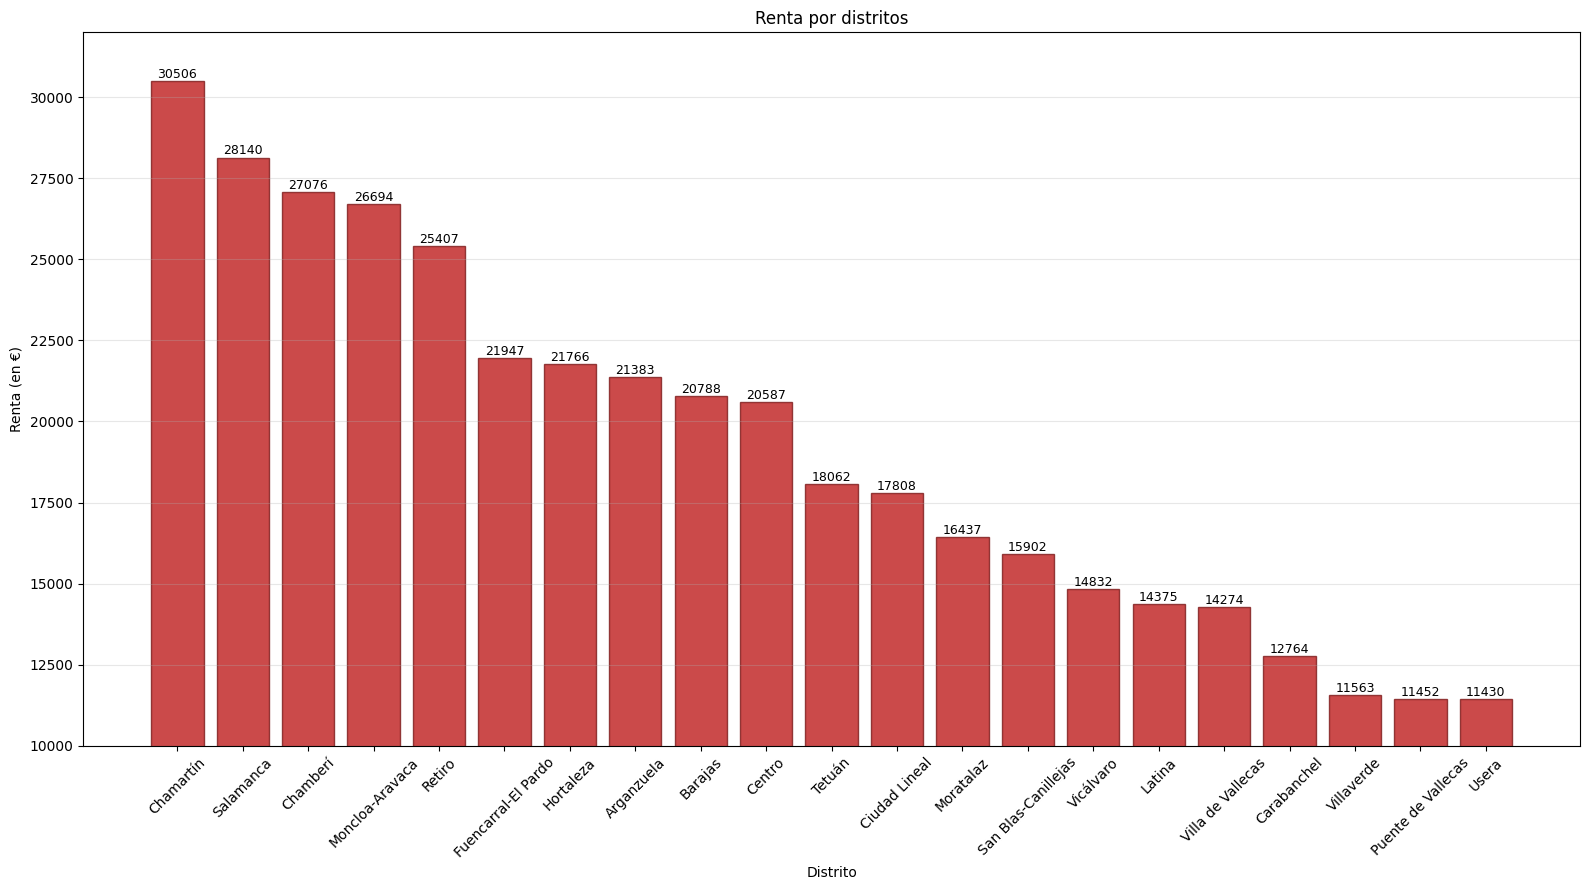

In [70]:
# Crear gráfico
plt.figure(figsize=(16, 9))  # Tamaño del gráfico (ancho, alto) en pulgadas

plt.bar(df_renta_x_district["distrito"],           # Eje X: etiquetas de las categorías
        df_renta_x_district["renta"],              # Eje Y: altura de cada barra
        color="#be1d1d",      # Color de las barras
        edgecolor="#7c1919",    # Color del borde de las barras
        linewidth=1,          # Grosor del borde
        alpha=0.8)            # Transparencia (1.0 = opaco, 0 = invisible)

# Añadir etiquetas
plt.title("Renta por distritos")      # Título general
plt.xlabel("Distrito")             # Texto del eje X
plt.ylabel("Renta (en €)")                # Texto del eje Y

# Mostrar valores encima de las barras
for i, valor in enumerate(df_renta_x_district["renta"]):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9)

# Rotamos las etiquetas del eje X
plt.xticks(rotation=45)

# Modificamos la escala en Y
plt.ylim(10000, 32000)

# Activamos fondo de rejilla
plt.grid(axis='y', linestyle='-', alpha=0.3)

# Ajustar espacio y mostrar
plt.tight_layout()

# Guardar imagen del gráfico.
plt.savefig("img/export_by_vsc/Madrid_renta_por_distrito_barras.png", dpi=150, bbox_inches='tight')

plt.show()
